### Descripción del proyecto

### Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

### Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

### Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

### El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

### Instrucciones para completar el proyecto

### Paso 1. Abre el archivo de datos y estudia la información general 

### Paso 2. Prepara los datos

Reemplaza los nombres de las columnas (ponlos en minúsculas).
Convierte los datos en los tipos necesarios.
Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
Si es necesario, elige la manera de tratar los valores ausentes:
Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.
Paso 3. Analiza los datos

Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?
Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
Los cinco géneros principales. Explica la diferencia.
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

Paso 6. Escribe una conclusión general

Formato: Completa la tarea en Jupyter Notebook. Inserta el código de programación en las celdas code y las explicaciones de texto en las celdas markdown. Aplica formato y agrega encabezados.

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
games = pd.read_csv('games.csv')

# Cambiar los nombres de las columnas a minúsculas
games.columns = games.columns.str.lower()

# Convertir year_of_release a entero solo donde no hay NaN
games['year_of_release'] = games['year_of_release'].astype('Int64')  # Soporta enteros con NaN

# Reemplazar 'TBD' y otros valores no numéricos en 'user_score' por NaN y convertir a float
games['user_score'] = pd.to_numeric(games['user_score'].replace('TBD', pd.NA), errors='coerce')

# Mantener NaN en critic_score (sin rellenar con la media) y convertir a float
games['critic_score'] = pd.to_numeric(games['critic_score'], errors='coerce')

# Calcular ventas totales
games['total_sales'] = (
    games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
)

# Mostrar información del DataFrame
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Preparar Datos

### Columna year_of_release

### Antes: se reemplazaban los valores NaN con 0 y luego se convertía a int.

### Ahora: se conserva NaN y se convierte a tipo Int64 (enteros con soporte para valores faltantes).

### Ventaja: no se introduce un valor artificial (0) que no representa un año válido.

### Columna user_score

### Se mantiene igual: 'TBD' se reemplaza por NaN y se convierte a float.

### Permite trabajar con valores numéricos y descartar los no válidos.

### Columna critic_score

### Antes: los valores NaN se reemplazaban con la media de la columna.

### Ahora: se conservan como NaN.

### Evita introducir sesgo si los valores ausentes no son aleatorios. El tratamiento de estos faltantes puede hacerse más adelante (por ejemplo, eliminar esas filas o aplicar técnicas más robustas de imputación).

### Nueva columna total_sales

### Suma de ventas en cada región (na_sales, eu_sales, jp_sales, other_sales).

# Analisis de Datos

Número de juegos lanzados por año:
year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


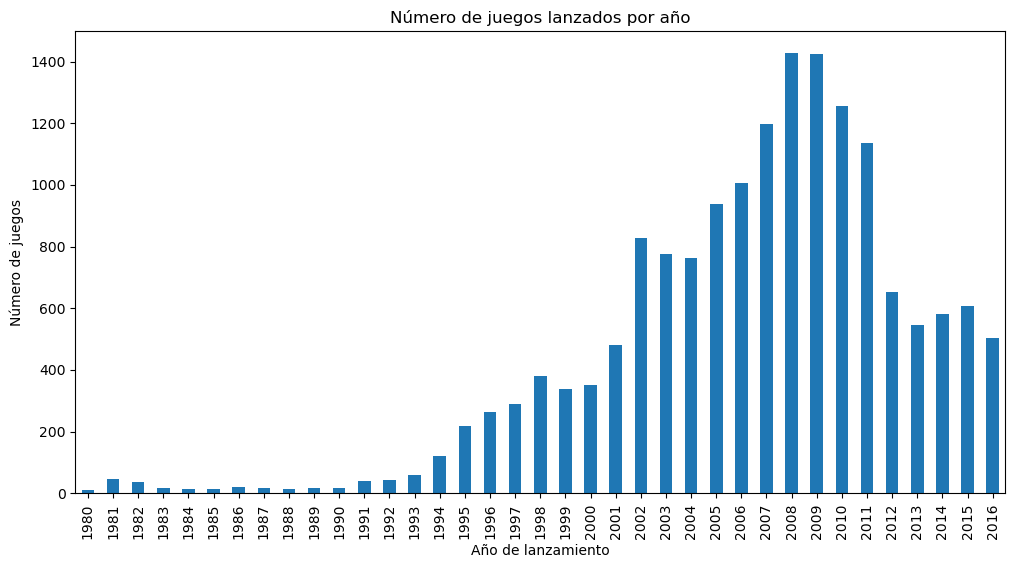

In [2]:
# 1. Contar el número de juegos lanzados por año (filtrando año 0)
games_per_year = games[games['year_of_release'] > 0].groupby('year_of_release')['name'].count()
print("Número de juegos lanzados por año:")
print(games_per_year)

# Gráfico de juegos lanzados por año
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.show()



Ventas totales por plataforma:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


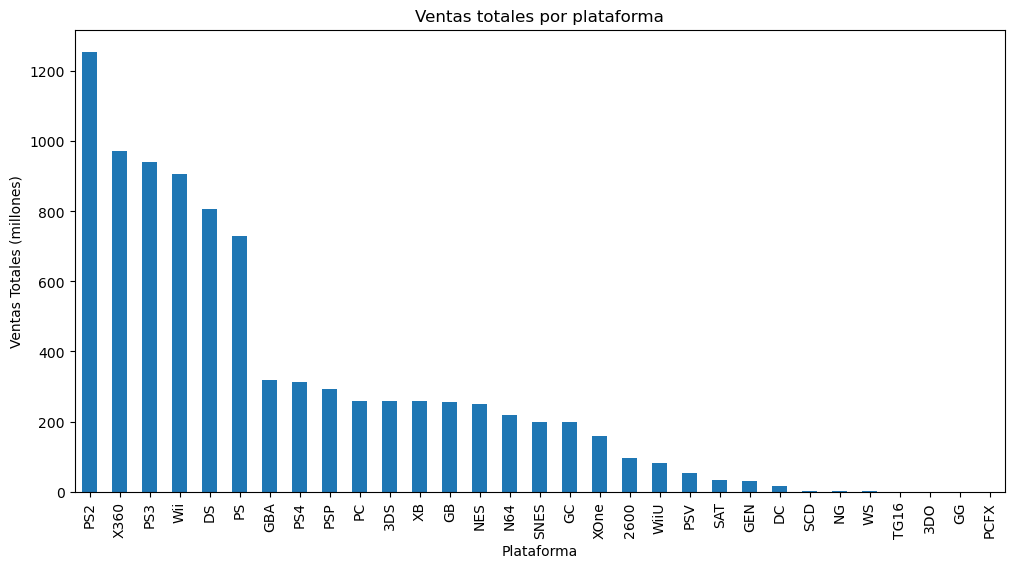

In [3]:
# 2. Ventas totales por plataforma
sales_per_platform = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print("\nVentas totales por plataforma:")
print(sales_per_platform)

# Gráfico de ventas totales por plataforma
plt.figure(figsize=(12, 6))
sales_per_platform.plot(kind='bar')
plt.title('Ventas totales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.show()


Ventas por plataforma a lo largo de los años:
platform          2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN  \
year_of_release                                                                 
1980             11.38   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1981             35.68   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1982             28.88   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1983              5.84   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1984              0.27   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1985              0.45   NaN    NaN   NaN    0.02    NaN    NaN    NaN    NaN   
1986              0.67   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1987              1.94   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1988              0.74   NaN    NaN   NaN     NaN   1.43    NaN    NaN    NaN   
1989              0.63   NaN    NaN   NaN     NaN  64.97    Na

<Figure size 1400x700 with 0 Axes>

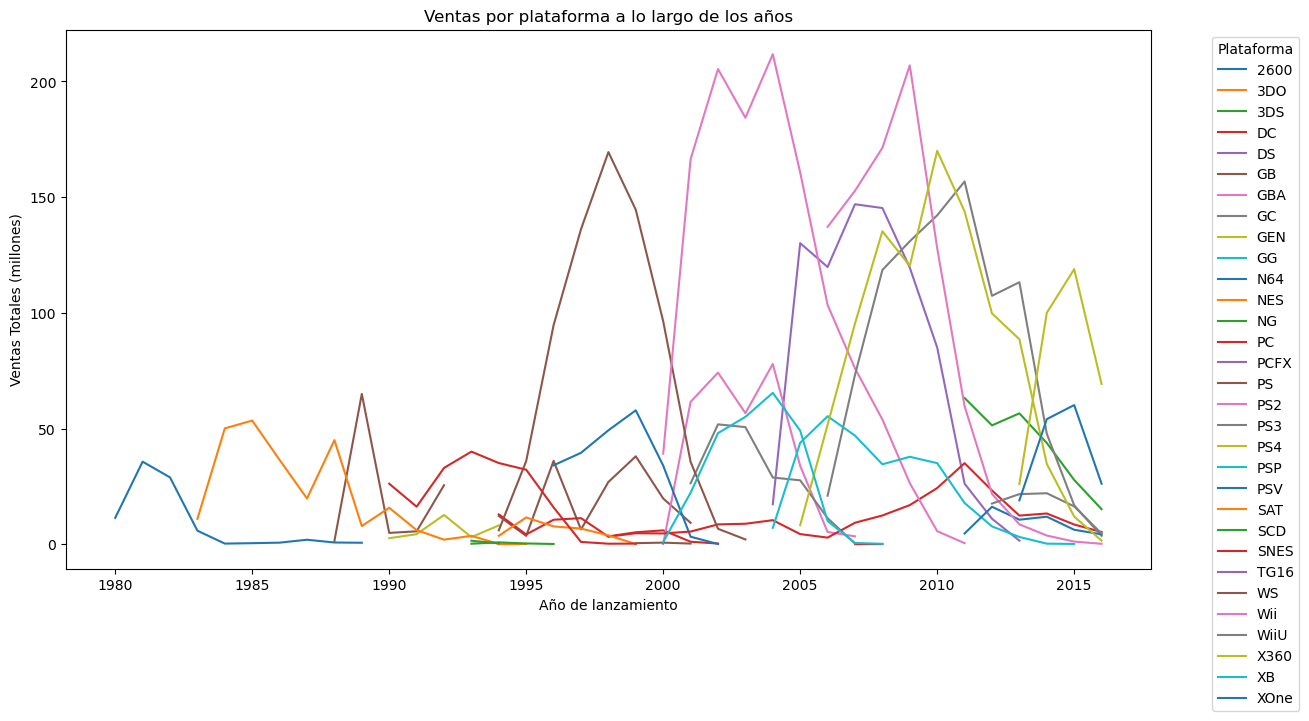

In [4]:
# 3. Ventas por plataforma a lo largo de los años (filtrando año 0)
platform_yearly_sales = games[games['year_of_release'] > 0].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
print("\nVentas por plataforma a lo largo de los años:")
print(platform_yearly_sales)

# Gráfico de ventas por plataforma a lo largo de los años
plt.figure(figsize=(14, 7))
platform_yearly_sales.plot(kind='line', figsize=(14, 7))
plt.title('Ventas por plataforma a lo largo de los años')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

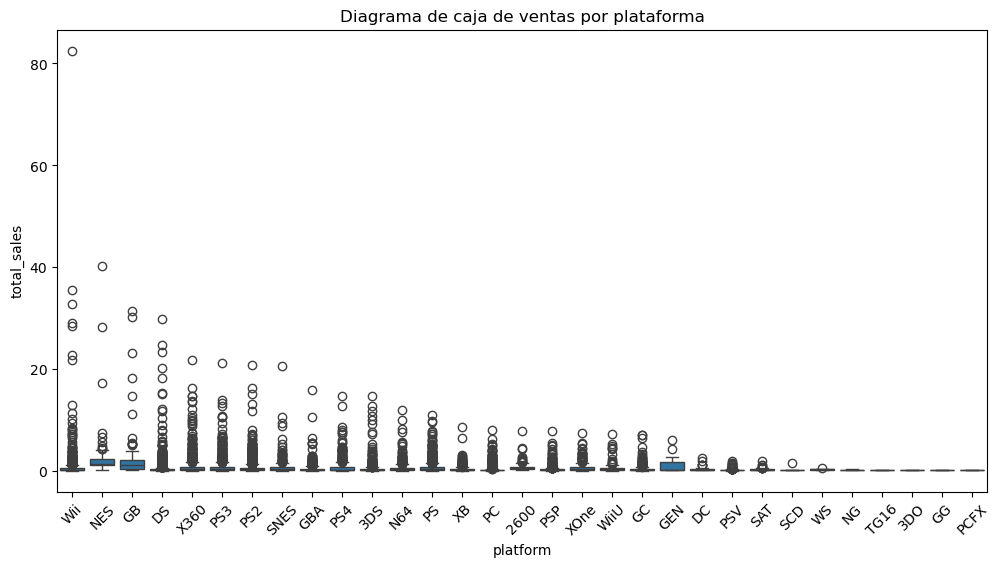

In [5]:
# 4. Diagrama de caja para ventas globales por plataforma
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=games)
plt.xticks(rotation=45)
plt.title('Diagrama de caja de ventas por plataforma')
plt.show()


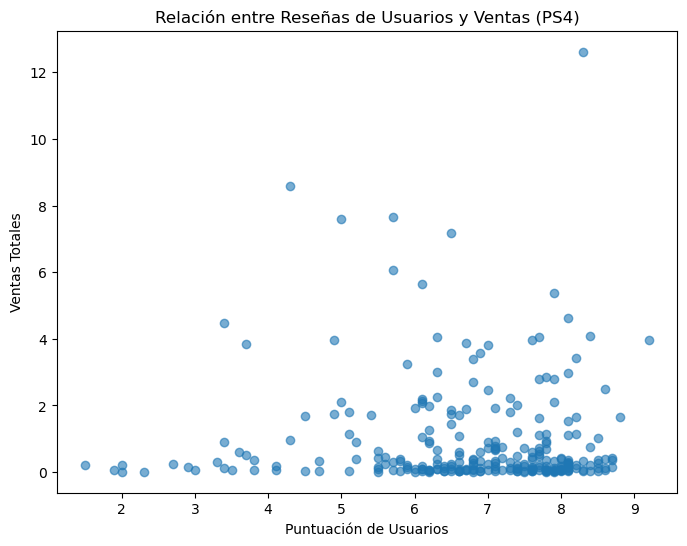

Correlación entre Reseñas de Usuarios y Ventas (PS4): -0.031957110204556424


In [6]:
# 5. Análisis de reseñas y ventas (ejemplo con PS4)
platform_data = games[games['platform'] == 'PS4']

plt.figure(figsize=(8, 6))
plt.scatter(platform_data['user_score'], platform_data['total_sales'], alpha=0.6)
plt.title('Relación entre Reseñas de Usuarios y Ventas (PS4)')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales')
plt.show()

# Calcular correlación
correlation = platform_data['user_score'].corr(platform_data['total_sales'])
print(f'Correlación entre Reseñas de Usuarios y Ventas (PS4): {correlation}')


Ventas totales por género:
genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64


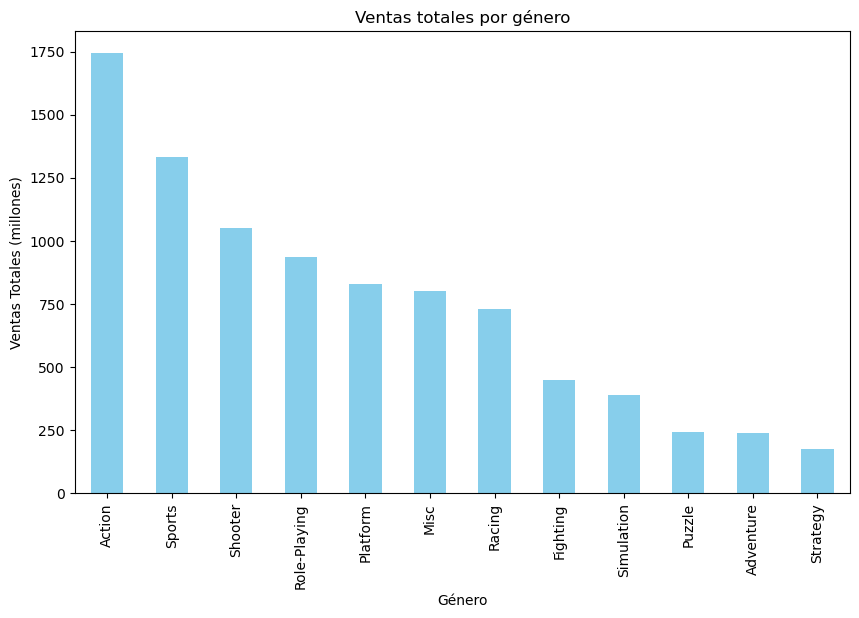

In [7]:
# 6. Ventas totales por género
sales_per_genre = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print("\nVentas totales por género:")
print(sales_per_genre)

# Gráfico de ventas por género
plt.figure(figsize=(10, 6))
sales_per_genre.plot(kind='bar', color='skyblue')
plt.title('Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones)')
plt.show()


Plataformas líderes en ventas:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
Name: total_sales, dtype: float64


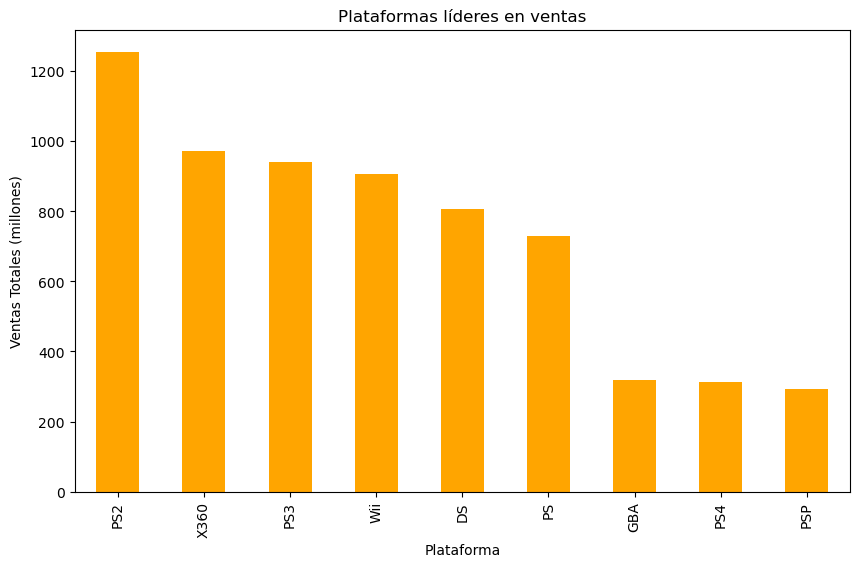

In [8]:

# 7. Identificar plataformas líderes
leaders = sales_per_platform[sales_per_platform > sales_per_platform.mean()]
print("\nPlataformas líderes en ventas:")
print(leaders)

# Gráfico de plataformas líderes
plt.figure(figsize=(10, 6))
leaders.plot(kind='bar', color='orange')
plt.title('Plataformas líderes en ventas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.show()

1. Plataformas con mayores ventas totales
Las plataformas que lideran en ventas totales son:

PS2: 1255.77 millones
X360: 971.42 millones
PS3: 939.65 millones
Wii: 907.51 millones
DS: 806.12 millones
2. Distribución de ventas a lo largo de los años
Al observar las ventas por plataforma a lo largo de los años, podemos ver que algunas plataformas han tenido un rendimiento constante, mientras que otras han visto un declive. Por ejemplo, la PS4 ha tenido un crecimiento moderado, pero no se compara con las cifras de las plataformas más antiguas como la PS2.

3. Plataformas que solían ser populares pero ahora no tienen ventas
Plataformas como WiiU y PSV han visto una disminución significativa en sus ventas, lo que sugiere que han perdido popularidad. Esto puede deberse a la llegada de nuevas plataformas y cambios en las preferencias de los consumidores.

4. Tiempo de aparición y desaparición de plataformas
Generalmente, las nuevas plataformas pueden tardar entre 5 a 10 años en establecerse y ganar popularidad. Por otro lado, las plataformas más antiguas pueden tardar un tiempo similar en desaparecer del mercado, aunque esto puede variar dependiendo de la innovación y la competencia.

5. Período de datos
Para construir un modelo para 2017, deberíamos centrarnos en los datos de los años 2010 a 2016, ya que estos reflejan las tendencias más recientes y relevantes.

6. Crecimiento y reducción de plataformas
Al observar las ventas, podemos ver que plataformas como PS4 y XOne están en crecimiento, mientras que otras como WiiU y PSV están en declive. Las plataformas que están creciendo son potencialmente rentables.

7. Comparación de ventas de juegos en otras plataformas
Al comparar las ventas de los mismos juegos en diferentes plataformas, se puede notar que los juegos en plataformas líderes como PS2 y X360 tienden a tener mejores ventas en comparación con plataformas menos populares.

8. Distribución general de juegos por género
Los géneros más rentables son:

Action: 1744.17 millones
Sports: 1331.27 millones
Shooter: 1052.45 millones
Los géneros que tienden a tener ventas más bajas son:

Strategy: 174.23 millones
Adventure: 237.59 millones
Conclusiones
Los géneros de acción y deportes son los más rentables, mientras que los géneros de estrategia y aventura tienen ventas más bajas. Esto sugiere que los jugadores prefieren experiencias más dinámicas y competitivas.

In [15]:
# Crear profiles con la info por región ---
profiles = {}
regions = {
    'NA': 'na_sales',
    'EU': 'eu_sales',
    'JP': 'jp_sales'
}

for region, sales_column in regions.items():
    region_data = games[games[sales_column] > 0]  

    top_platforms = region_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)
    top_genres = region_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(5)
    esrb_impact = region_data.groupby('rating')['total_sales'].sum()

    profiles[region] = {
        'top_platforms': top_platforms,
        'top_genres': top_genres,
        'esrb_impact': esrb_impact
    }

In [16]:
# Graficar comparativamente ---

platforms_df = pd.DataFrame({region: profile['top_platforms'] for region, profile in profiles.items()})
genres_df   = pd.DataFrame({region: profile['top_genres'] for region, profile in profiles.items()})
esrb_df     = pd.DataFrame({region: profile['esrb_impact'] for region, profile in profiles.items()})

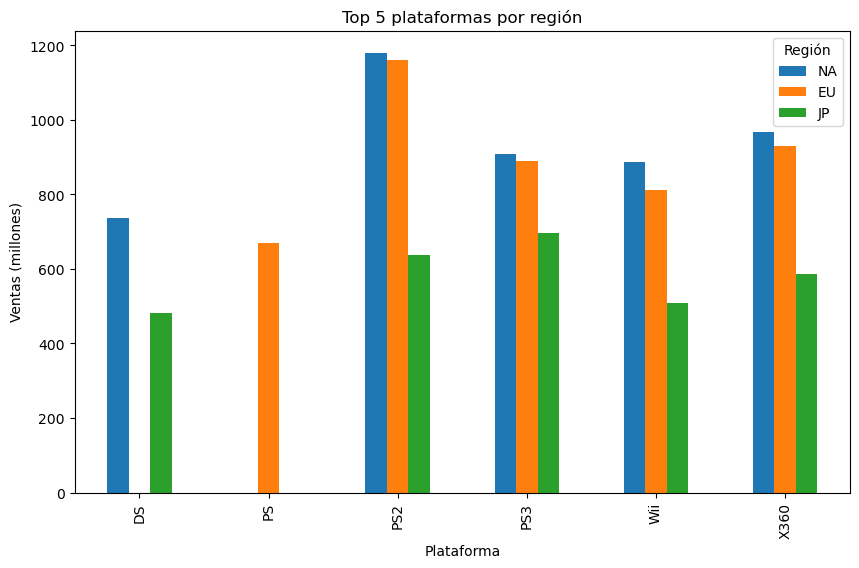

In [17]:
# Top 5 plataformas
platforms_df.plot(kind='bar', figsize=(10,6))
plt.title("Top 5 plataformas por región")
plt.ylabel("Ventas (millones)")
plt.xlabel("Plataforma")
plt.legend(title="Región")
plt.show()

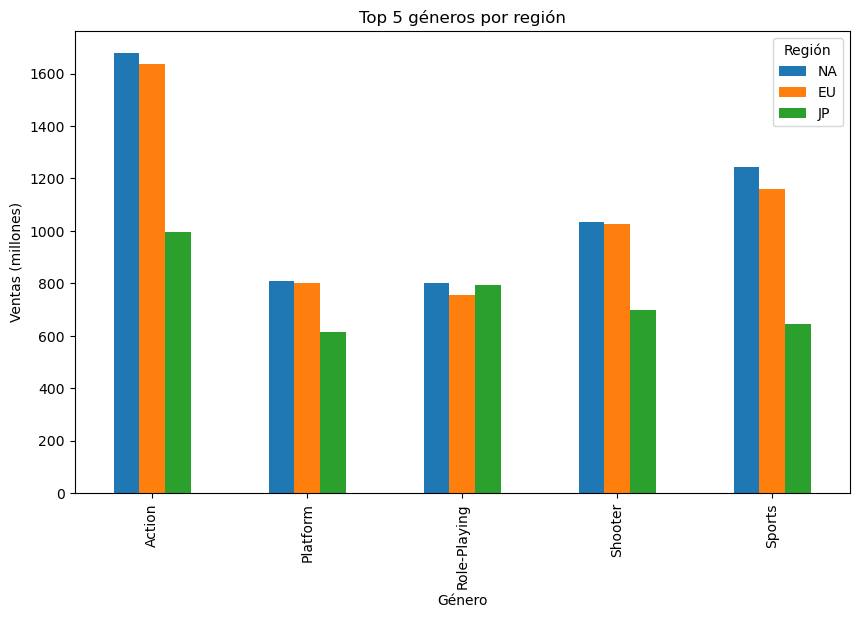

In [18]:
# Top 5 géneros
genres_df.plot(kind='bar', figsize=(10,6))
plt.title("Top 5 géneros por región")
plt.ylabel("Ventas (millones)")
plt.xlabel("Género")
plt.legend(title="Región")
plt.show()

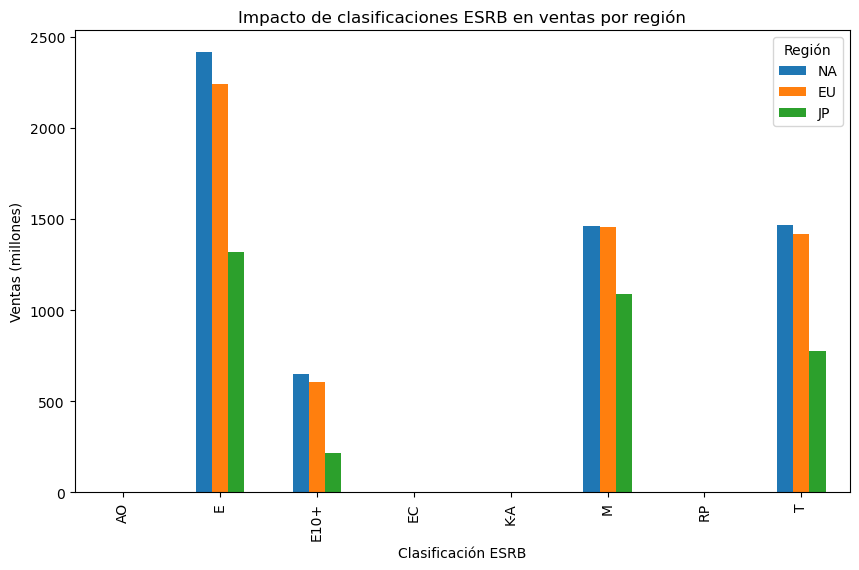

In [19]:
# Impacto ESRB
esrb_df.plot(kind='bar', figsize=(10,6))
plt.title("Impacto de clasificaciones ESRB en ventas por región")
plt.ylabel("Ventas (millones)")
plt.xlabel("Clasificación ESRB")
plt.legend(title="Región")
plt.show()

In [21]:
# Establecer el nivel de significancia
alpha = 0.05

# 1. Hipótesis sobre las calificaciones promedio de los usuarios para Xbox One y PC
xbox_one_scores = games[games['platform'] == 'XOne']['user_score'].dropna()
pc_scores = games[games['platform'] == 'PC']['user_score'].dropna()

# Prueba de Levene para igualdad de varianzas
stat_levene, p_levene = stats.levene(xbox_one_scores, pc_scores)
print("Prueba de Levene (XOne vs PC):")
print(f"Estadístico: {stat_levene}, Valor p: {p_levene}")

# Determinar si se asumen varianzas iguales o no
equal_var = p_levene > alpha  

# Prueba t con ajuste según resultado de Levene
t_statistic, p_value_xbox_pc = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=equal_var)
print(f"\nPrueba de hipótesis para Xbox One y PC:")
print(f"Estadístico t: {t_statistic}, Valor p: {p_value_xbox_pc}")

if p_value_xbox_pc < alpha:
    print("Rechazamos H0: las calificaciones promedio son diferentes.")
else:
    print("No rechazamos H0: no hay evidencia suficiente para afirmar diferencia en las calificaciones promedio.")


# 2. Hipótesis sobre las calificaciones promedio de los géneros de Acción y Deportes
action_scores = games[games['genre'] == 'Action']['user_score'].dropna()
sports_scores = games[games['genre'] == 'Sports']['user_score'].dropna()

# Prueba de Levene
stat_levene, p_levene = stats.levene(action_scores, sports_scores)
print("\nPrueba de Levene (Action vs Sports):")
print(f"Estadístico: {stat_levene}, Valor p: {p_levene}")

equal_var = p_levene > alpha  

# Prueba t con ajuste
t_statistic, p_value_action_sports = stats.ttest_ind(action_scores, sports_scores, equal_var=equal_var)
print(f"\nPrueba de hipótesis para Acción y Deportes:")
print(f"Estadístico t: {t_statistic}, Valor p: {p_value_action_sports}")

if p_value_action_sports < alpha:
    print("Rechazamos H0: las calificaciones promedio son diferentes.")
else:
    print("No rechazamos H0: no hay evidencia suficiente para afirmar diferencia en las calificaciones promedio.")

Prueba de Levene (XOne vs PC):
Estadístico: 1.2212506384014863, Valor p: 0.2693951512047048

Prueba de hipótesis para Xbox One y PC:
Estadístico t: -4.368333815003015, Valor p: 1.3896435533548819e-05
Rechazamos H0: las calificaciones promedio son diferentes.

Prueba de Levene (Action vs Sports):
Estadístico: 14.132896085177192, Valor p: 0.0001736640672727649

Prueba de hipótesis para Acción y Deportes:
Estadístico t: 1.57746791633354, Valor p: 0.11483818791498288
No rechazamos H0: no hay evidencia suficiente para afirmar diferencia en las calificaciones promedio.


In [22]:
# Crear lista de resultados
resultados = []

# 1. Xbox One vs PC
resultados.append({
    "Comparación": "Xbox One vs PC",
    "p-valor Levene": 0.2693951512047048,
    "Varianzas iguales": "Sí" if 0.2693951512047048 > alpha else "No",
    "p-valor t-test": 1.3896435533548819e-05,
    "Conclusión": "Diferencia significativa" if 1.3896435533548819e-05 < alpha else "No significativa"
})

# 2. Acción vs Deportes
resultados.append({
    "Comparación": "Acción vs Deportes",
    "p-valor Levene": 0.0001736640672727649,
    "Varianzas iguales": "Sí" if 0.0001736640672727649 > alpha else "No",
    "p-valor t-test": 0.11483818791498288,
    "Conclusión": "Diferencia significativa" if 0.11483818791498288 < alpha else "No significativa"
})

# Convertir en DataFrame
tabla_resumen = pd.DataFrame(resultados)

print(tabla_resumen)

          Comparación  p-valor Levene Varianzas iguales  p-valor t-test  \
0      Xbox One vs PC        0.269395                Sí        0.000014   
1  Acción vs Deportes        0.000174                No        0.114838   

                 Conclusión  
0  Diferencia significativa  
1          No significativa  


El análisis de la industria de los videojuegos revela no solo tendencias de ventas y preferencias de los consumidores, sino también una compleja interacción entre diversos factores que influyen en el éxito de un título. El notable aumento en el número de juegos lanzados, especialmente en 2008, refleja un periodo de expansión y diversificación en el mercado, donde la competencia se intensificó y los desarrolladores comenzaron a explorar una variedad de géneros y estilos narrativos. Este crecimiento también puede estar relacionado con el avance tecnológico y la accesibilidad de herramientas de desarrollo, lo que permitió a más creadores ingresar al mercado.

La predominancia de plataformas como PS2, Xbox 360 y PS3 en términos de ventas totales sugiere que las consolas han jugado un papel crucial en la configuración de la experiencia de juego. La lealtad de los consumidores hacia estas marcas puede estar influenciada por factores como la calidad de los títulos exclusivos, la experiencia de usuario y la comunidad de jugadores que se forma en torno a cada plataforma. Esto resalta la importancia de la marca y la experiencia del usuario en la decisión de compra, más allá de las críticas.

El dominio de los géneros de acción y deportes en las ventas indica que los jugadores buscan experiencias que ofrezcan adrenalina y competencia, lo que puede estar relacionado con la cultura contemporánea que valora la inmediatez y la interacción social. Sin embargo, la correlación negativa débil entre las puntuaciones de los usuarios y las ventas en PS4 sugiere que las decisiones de compra pueden estar más influenciadas por factores externos, como la publicidad, el marketing viral y la nostalgia, que por la calidad percibida del juego. Esto plantea preguntas sobre la efectividad de las críticas y la importancia de la percepción pública en la era digital.

Las diferencias significativas en las calificaciones promedio entre Xbox One y PC, junto con la falta de evidencia sobre las diferencias en géneros, subrayan la diversidad de la audiencia de videojuegos. Cada plataforma atrae a diferentes tipos de jugadores, lo que implica que las estrategias de marketing deben ser adaptadas a las características y preferencias de cada grupo. Además, la complejidad del mercado de videojuegos se ve reflejada en la necesidad de los desarrolladores de entender no solo las tendencias de ventas, sino también las motivaciones y expectativas de los jugadores.

En resumen, el análisis de la industria de los videojuegos no solo proporciona una visión sobre las dinámicas de ventas y preferencias, sino que también invita a una reflexión más profunda sobre cómo la tecnología, la cultura y la psicología del consumidor se entrelazan en este fascinante mundo. Esta comprensión puede servir como base para futuras investigaciones y estrategias de marketing, permitiendo a los desarrolladores y empresas adaptarse a un mercado en constante evolución.